# Module 1 Lab – Snakes & Ladders

## Lab Group 9
* RAUL JAROD CONANAN
* JOSEPH JR. DURON
* TYLER ONG
* JULIANA YSABELLE VALDEZ

In [ ]:
import numpy as np
import numpy.random as nr
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=300)

## Problem 1

**Instruction:** Using a Monte Carlo simulation approach, approximate the probability that we will win in exactly 4 turns.

In [ ]:
def play(win_state=12):
    current_state = 1
    num_turns = 0
    while current_state < win_state:
        current_state += np.random.randint(1, 5)
        num_turns += 1
    return num_turns

In [ ]:
def simulate(n: int):
    win_turns = np.array([])
    for _ in range(n):
        win_turns = np.append(win_turns, play())

    plt.hist(win_turns, bins=np.arange(win_turns.min(), win_turns.max() + 1.5) - 0.5,
             density=True, edgecolor="black", alpha=0.75)

    plt.xlabel("Number of Turns")
    plt.ylabel("Probability")
    plt.title("Histogram of Winning Turns")
    plt.grid(axis="y", alpha=0.7)
    plt.show()

    unique_values, counts = np.unique(win_turns, return_counts=True)
    probabilities = counts / counts.sum()
    return {"Turns": unique_values, "Probability": probabilities}

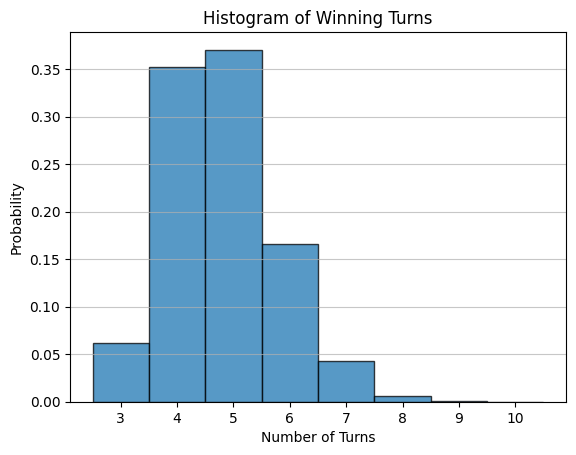

,Turns,Probability
0,3.0,0.06175
1,4.0,0.35183
2,5.0,0.37046
3,6.0,0.16592
4,7.0,0.04298
5,8.0,0.00645
6,9.0,0.00060
7,10.0,0.00001


In [ ]:
pd.DataFrame.from_dict(data=simulate(100000))

**Answer:** The probability that a player can win in 4 turns given a 12 square board with no snakes or ladders is approximately 35.18%.

## Problem 2

**Instructions:** Construct the transition matrix for the problem. Then plot the probability of winning as a function of the number of moves in the game. What is the modal number of moves required by a single player to finish the game? (Note: You may find the numpy function argmax useful for this item.)

In [ ]:
trans_mat = np.zeros((12,12))

probability = 1/4

for row in range(len(trans_mat)):
    for i in range(1, 5):
        if row + i >= 12:
            trans_mat[row, 11] += probability
        else:
            trans_mat[row, row+i] += probability

trans_mat

array([[0.  , 0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.5 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.75],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [ ]:
def play(trans_mat, win_state=12):
    curr_state = 1
    moves = 0
    while curr_state < win_state:
        next_state = nr.choice(range(1,13), p=trans_mat[curr_state-1], size=1)[0]
        curr_state = next_state
        moves += 1
    return moves

In [ ]:
def simulate(trans_mat, n=10000):
    win_moves = []
    for _ in range(n):
        win_moves.append(play(trans_mat))
    win_moves = np.array(win_moves, dtype=np.int64)
    modal = np.bincount(win_moves).argmax()

    plt.hist(win_moves, bins='auto', density=True, edgecolor="black", alpha=0.75)
    plt.xlabel("Number of Moves to Win")
    plt.ylabel("Probability Density")
    plt.title("Probability Distribution of Moves to Win")
    plt.show()

    return modal

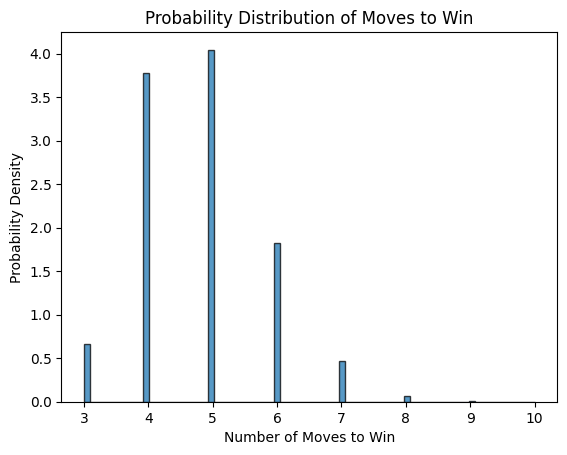

5

In [ ]:
simulate(trans_mat)

**Answer:** The modal number of moves required by a single player to finish the game given 12 squares and no snakes or ladders is **5 moves**

## Problem 3

Repeat Problem 2, but this time, for a game with the actual Snakes and Ladders as indicated in the picture above.


In [ ]:
def construct_trans_mat(snakes: dict, ladders: dict, win_state=12, die=4):
    probability = 1/die
    trans_mat = np.zeros((12,12))
    for row in range(len(trans_mat)):
        for i in range(1,die+1):
            next_state = row + i
            if (next_state + 1) in ladders:
                trans_mat[row, ladders[next_state + 1] - 1] += probability
            elif (next_state + 1) in snakes:
                trans_mat[row, snakes[next_state + 1] - 1] += probability
            elif next_state >= win_state:
                trans_mat[row, win_state - 1] += probability
            else:
                trans_mat[row, next_state] += probability
    return trans_mat

In [ ]:
snakes = {9: 3, 6: 4, 11: 7}
ladders = {8: 10, 2: 7}

In [ ]:
prob3_trans_mat = construct_trans_mat(snakes, ladders)
prob3_trans_mat

array([[0.  , 0.  , 0.25, 0.25, 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.5 , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.25, 0.  , 0.25, 0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.25, 0.  , 0.  , 0.25, 0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.5 , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.5 , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.25, 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.25, 0.  , 0.5 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.75],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

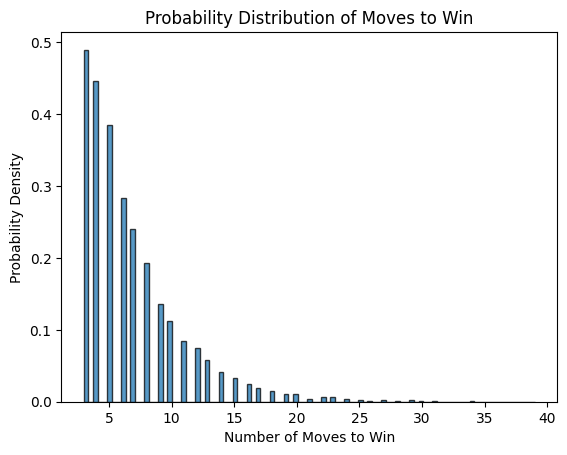

In [ ]:
win_move = simulate(prob3_trans_mat)

In [ ]:
win_move

3

**Answer:** The most common number of moves required to win the game with the given snakes and ladders is **3 moves**.